In [90]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')

import pandas_profiling as pp

%matplotlib inline

In [2]:
ronaldo=pd.read_csv('data.csv')

In [3]:
ronaldo.head(10)

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0
5,5,244.0,-145.0,-11.0,9.0,3.0,0.0,NaN,32.0,34.0,...,"45.539131, -122.651648",shot - 17,NaN,20000012,1610612747,9.00,3.0,0.000,NaN,34.0
6,6,251.0,0.0,0.0,8.0,NaN,0.0,2000-01,52.0,20.0,...,"45.539131, -122.651648",NaN,shot - 4,20000012,1610612747,8.00,3.0,0.000,112.2000,89.4
7,7,254.0,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,68.64,3.0,0.000,5.0000,22.0
8,8,265.0,-65.0,NaN,6.0,3.0,0.0,2000-01,12.0,32.0,...,"45.539131, -122.651648",shot - 36,NaN,20000012,1610612747,6.00,3.0,0.000,12.0000,32.0
9,9,294.0,-33.0,NaN,3.0,3.0,0.0,2000-01,36.0,32.0,...,"45.539131, -122.651648",shot - 44,NaN,20000012,1610612747,3.00,3.0,0.000,52.2000,NaN


In [4]:
ronaldo.columns

Index(['Unnamed: 0', 'match_event_id', 'location_x', 'location_y',
       'remaining_min', 'power_of_shot', 'knockout_match', 'game_season',
       'remaining_sec', 'distance_of_shot', 'is_goal', 'area_of_shot',
       'shot_basics', 'range_of_shot', 'team_name', 'date_of_game',
       'home/away', 'shot_id_number', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot', 'match_id', 'team_id', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'],
      dtype='object')

In [5]:
pp.ProfileReport(ronaldo)

Number of variables,28
Number of observations,30697
Total Missing (%),8.4%
Total size in memory,6.6 MiB
Average record size in memory,224.0 B
Numeric,14
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,4


In [6]:
ronaldo['is_goal'].value_counts()

0.0    13550
1.0    10879
Name: is_goal, dtype: int64

In [7]:
ronaldo['is_goal'].isnull().sum()

6268

In [8]:
ronaldo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
Unnamed: 0               30697 non-null int64
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
shot_id_number           29134 non-null float64
lat/lng                  29132 non-n

### EDA Step 1: Univariate Analysis

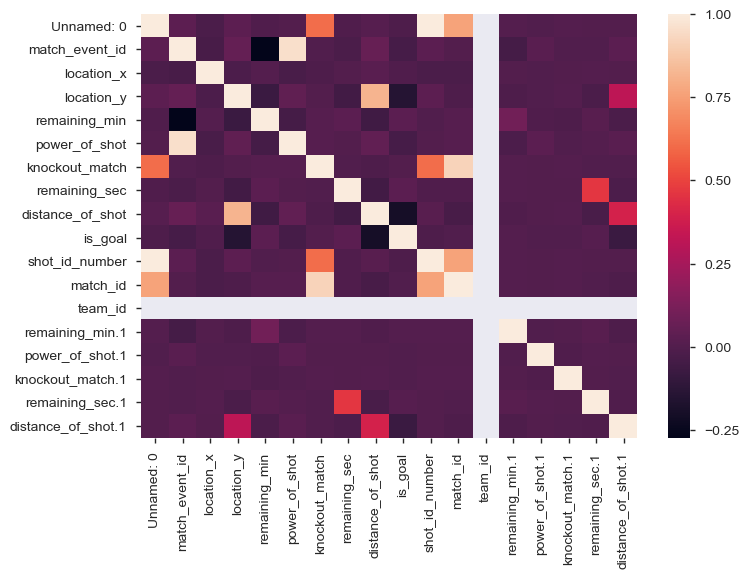

In [9]:
corr=ronaldo.corr()
sns.heatmap(corr)

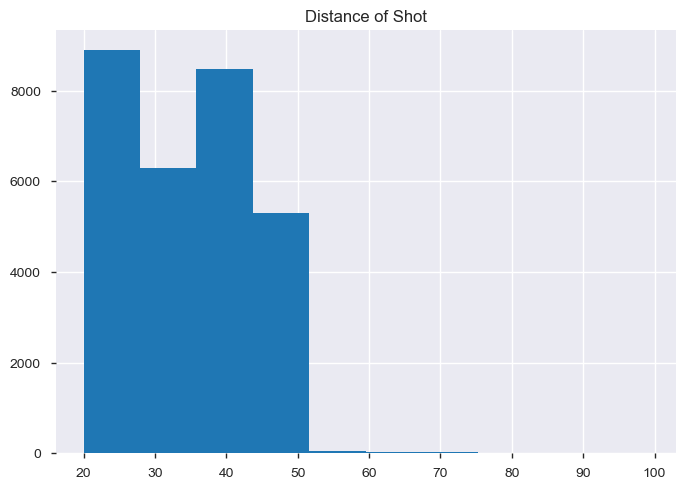

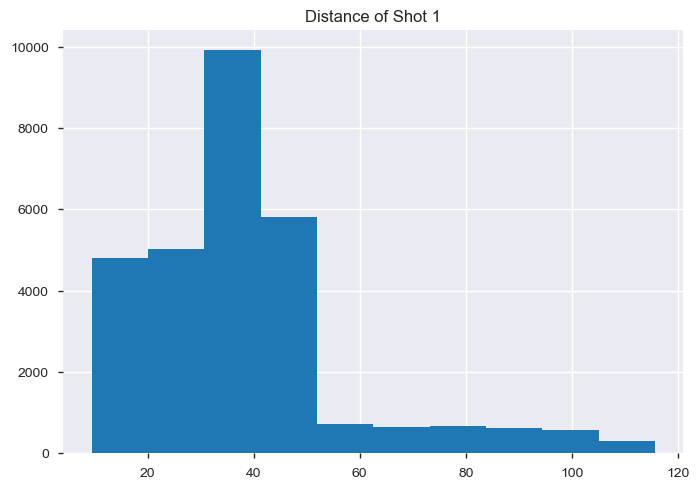

In [10]:
#Distance of Shot

plt.hist(ronaldo['distance_of_shot'])
plt.title('Distance of Shot')
plt.show()

plt.hist(ronaldo['distance_of_shot.1'])
plt.title('Distance of Shot 1')
plt.show()

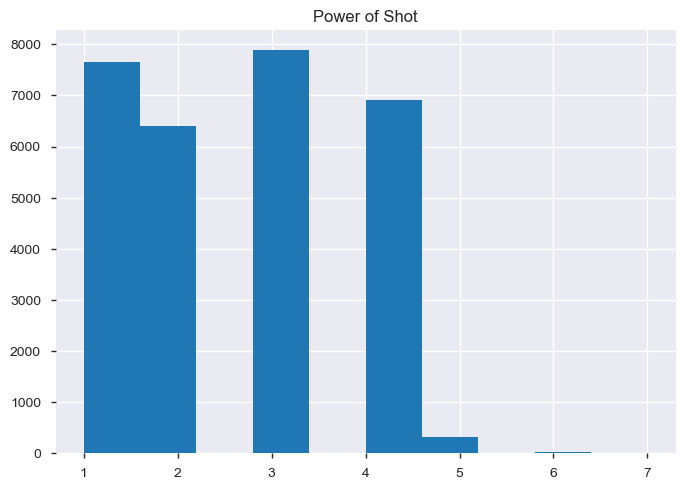

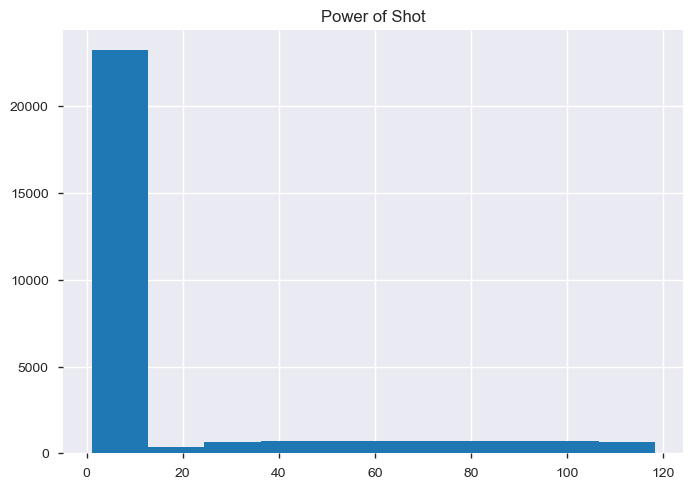

In [11]:
#Power of Shot

plt.hist(ronaldo['power_of_shot'])
plt.title('Power of Shot')
plt.show()

plt.hist(ronaldo['power_of_shot.1'])
plt.title('Power of Shot')
plt.show()

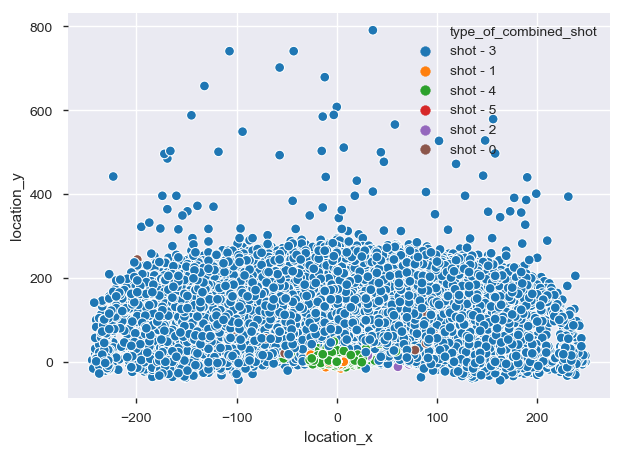

In [12]:
#Locations


plt.figure(figsize=(7,5))
sns.scatterplot(ronaldo['location_x'],ronaldo['location_y'],hue=ronaldo['type_of_combined_shot'])
plt.show()

In [13]:
ronaldo['type_of_combined_shot'].value_counts()

shot - 3    11685
shot - 4     2736
shot - 1      609
shot - 5       90
shot - 2       82
shot - 0       78
Name: type_of_combined_shot, dtype: int64

So, Shot 3 is the most used one during all locations by Ronaldo.

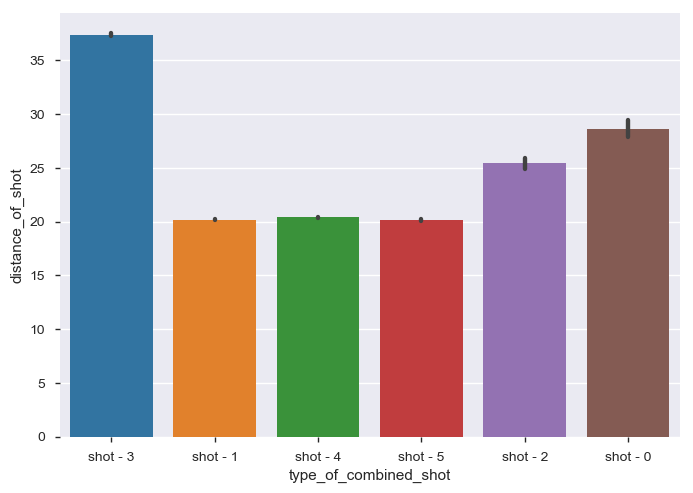

In [14]:
#Distance and Type of Shot

sns.barplot(ronaldo['type_of_combined_shot'],ronaldo['distance_of_shot'])

Also, Shot 3 covers the maximum distance

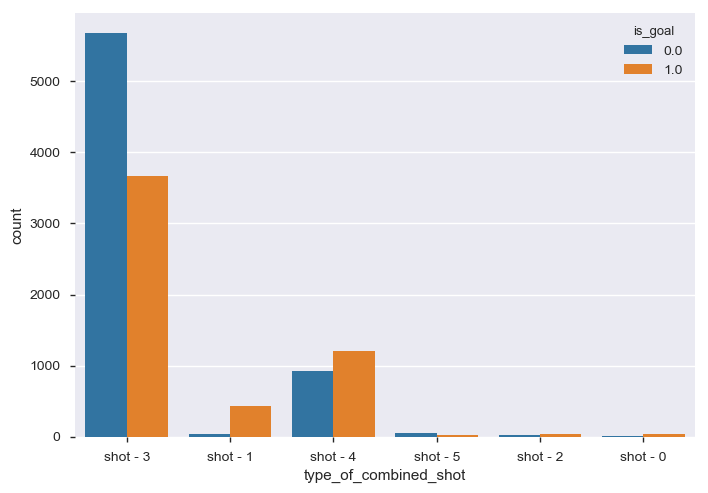

In [15]:
#Shot type and Goal

sns.countplot(x='type_of_combined_shot',hue='is_goal',data=ronaldo)

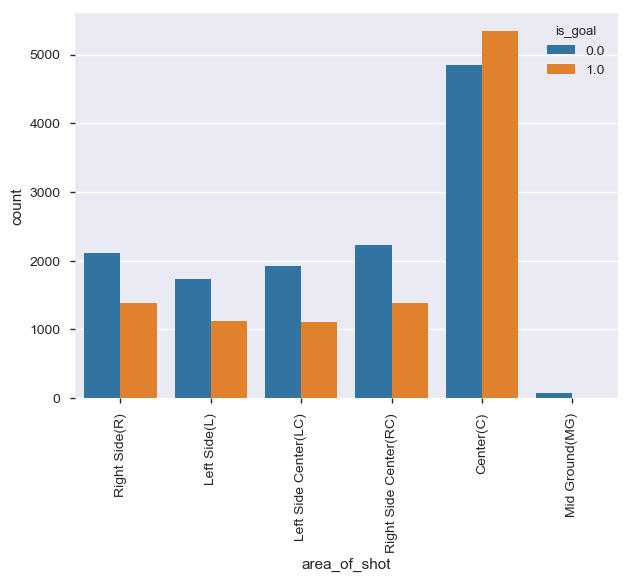

In [16]:
#Area and shot

plt.figure(figsize=[7,5])
sns.countplot(x='area_of_shot',hue='is_goal',data=ronaldo)
plt.xticks(rotation=90)
plt.show()

Maximum number of Goals were made from Center area, while from other areas goals were less and almost in equal numbers.

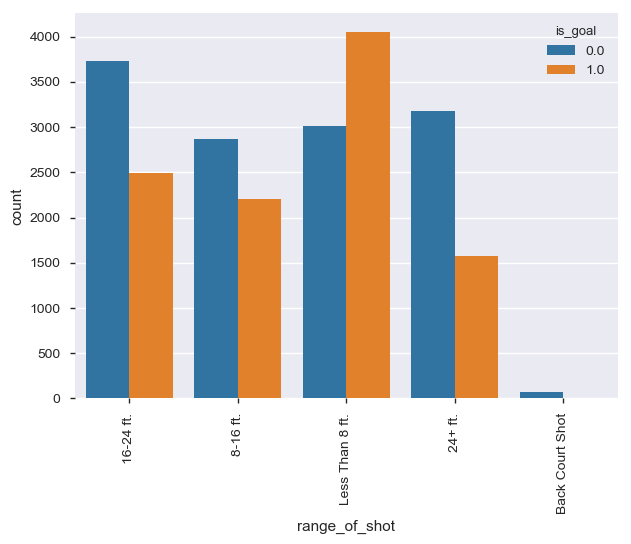

In [17]:
#Range and Shot

plt.figure(figsize=[7,5])
sns.countplot(x='range_of_shot',hue='is_goal',data=ronaldo)
plt.xticks(rotation=90)
plt.show()

More shots were made from range less than 8 feet from the goal net.

## Data Cleaning

In [18]:
ronaldo.columns

Index(['Unnamed: 0', 'match_event_id', 'location_x', 'location_y',
       'remaining_min', 'power_of_shot', 'knockout_match', 'game_season',
       'remaining_sec', 'distance_of_shot', 'is_goal', 'area_of_shot',
       'shot_basics', 'range_of_shot', 'team_name', 'date_of_game',
       'home/away', 'shot_id_number', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot', 'match_id', 'team_id', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'],
      dtype='object')

In [19]:
ronaldo.head(10)

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0
5,5,244.0,-145.0,-11.0,9.0,3.0,0.0,NaN,32.0,34.0,...,"45.539131, -122.651648",shot - 17,NaN,20000012,1610612747,9.00,3.0,0.000,NaN,34.0
6,6,251.0,0.0,0.0,8.0,NaN,0.0,2000-01,52.0,20.0,...,"45.539131, -122.651648",NaN,shot - 4,20000012,1610612747,8.00,3.0,0.000,112.2000,89.4
7,7,254.0,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,68.64,3.0,0.000,5.0000,22.0
8,8,265.0,-65.0,NaN,6.0,3.0,0.0,2000-01,12.0,32.0,...,"45.539131, -122.651648",shot - 36,NaN,20000012,1610612747,6.00,3.0,0.000,12.0000,32.0
9,9,294.0,-33.0,NaN,3.0,3.0,0.0,2000-01,36.0,32.0,...,"45.539131, -122.651648",shot - 44,NaN,20000012,1610612747,3.00,3.0,0.000,52.2000,NaN


In [20]:

ronaldo.drop('lat/lng', axis=1, inplace=True)
ronaldo.drop('team_name', axis=1, inplace=True) 
ronaldo.drop('match_id', axis=1, inplace=True) 
ronaldo.drop('match_event_id', axis=1, inplace=True)
ronaldo.drop('shot_id_number', axis=1, inplace=True) 
ronaldo.drop('Unnamed: 0', axis=1, inplace=True) 

In [21]:
ronaldo.columns

Index(['location_x', 'location_y', 'remaining_min', 'power_of_shot',
       'knockout_match', 'game_season', 'remaining_sec', 'distance_of_shot',
       'is_goal', 'area_of_shot', 'shot_basics', 'range_of_shot',
       'date_of_game', 'home/away', 'type_of_shot', 'type_of_combined_shot',
       'team_id', 'remaining_min.1', 'power_of_shot.1', 'knockout_match.1',
       'remaining_sec.1', 'distance_of_shot.1'],
      dtype='object')

In [22]:
ronaldo.shape

(30697, 22)

Filling Missing Values in time related columns

In [23]:
ronaldo['remaining_min'].fillna(value=ronaldo['remaining_min'].mean(),inplace=True)

In [24]:
ronaldo['remaining_min.1'].fillna(value=ronaldo['remaining_min.1'].mean(),inplace=True)

In [25]:
ronaldo['remaining_sec'].fillna(value=ronaldo['remaining_sec'].mean(),inplace=True)

In [26]:
ronaldo['remaining_sec.1'].fillna(value=ronaldo['remaining_sec.1'].mean(),inplace=True)

Creating new columns as seconds left for the end.

In [27]:
ronaldo['seconds_end'] = 60 * ronaldo['remaining_min'] + ronaldo['remaining_sec']

In [28]:
ronaldo['seconds_end.1'] = 60 * ronaldo['remaining_min.1'] + ronaldo['remaining_sec.1']

Dropping time related columns used 

In [29]:
ronaldo.drop('remaining_min', axis=1, inplace=True) 

In [30]:
ronaldo.drop('remaining_min.1', axis=1, inplace=True) 

In [31]:
ronaldo.drop('remaining_sec', axis=1, inplace=True) 

In [32]:
ronaldo.drop('remaining_sec.1', axis=1, inplace=True) 

In [33]:
ronaldo.isnull().sum()

location_x                1461
location_y                1540
power_of_shot             1486
knockout_match            1517
game_season               5862
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
date_of_game              1550
home/away                 1497
type_of_shot             15280
type_of_combined_shot    15417
team_id                      0
power_of_shot.1           1539
knockout_match.1          1493
distance_of_shot.1        1568
seconds_end                  0
seconds_end.1                0
dtype: int64

In [34]:
ronaldo['location_x'].fillna(value=ronaldo['location_x'].mean(),inplace=True)

In [35]:
ronaldo['location_y'].fillna(value=ronaldo['location_y'].mean(),inplace=True)

In [36]:
ronaldo['power_of_shot.1'].fillna(value=ronaldo['power_of_shot.1'].mode(),inplace=True)

In [37]:
ronaldo['power_of_shot'].fillna(value=ronaldo['power_of_shot'].mode(),inplace=True)

In [38]:
ronaldo.isnull().sum()

location_x                   0
location_y                   0
power_of_shot             1486
knockout_match            1517
game_season               5862
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
date_of_game              1550
home/away                 1497
type_of_shot             15280
type_of_combined_shot    15417
team_id                      0
power_of_shot.1           1539
knockout_match.1          1493
distance_of_shot.1        1568
seconds_end                  0
seconds_end.1                0
dtype: int64

In [39]:
ronaldo['distance_of_shot'].mode()

0    20.0
dtype: float64

In [40]:
ronaldo['distance_of_shot'].fillna(ronaldo['distance_of_shot'].mode().ix[0],inplace=True)

In [41]:
ronaldo['distance_of_shot.1'].fillna(ronaldo['distance_of_shot.1'].mode().ix[0],inplace=True)


In [42]:
ronaldo['knockout_match'].fillna(value=0.0,inplace=True)

In [43]:
ronaldo['knockout_match.1'].fillna(value=0.0,inplace=True)

In [44]:
ronaldo['range_of_shot'].fillna(ronaldo['range_of_shot'].mode().ix[0],inplace=True)

In [45]:
ronaldo['date_of_game']=pd.to_datetime(ronaldo['date_of_game'])

In [46]:
ronaldo['date_of_game'].ffill(axis=0,inplace=True)

In [47]:
ronaldo['home/away'].ffill(axis=0,inplace=True)

In [48]:
ronaldo['type_of_combined_shot'].fillna(ronaldo['type_of_combined_shot'].mode().ix[0],inplace=True)

In [49]:
ronaldo['game_season'].ffill(axis=0,inplace=True)

In [50]:
ronaldo['power_of_shot'].ffill(axis=0,inplace=True)

In [51]:
ronaldo['power_of_shot.1'].ffill(axis=0,inplace=True)

In [52]:
ronaldo.drop(['team_id','type_of_shot'],axis=1,inplace=True)

In [53]:
ronaldo.shape

(30697, 18)

In [54]:
ronaldo.isnull().sum()

location_x                  0
location_y                  0
power_of_shot               0
knockout_match              0
game_season                 0
distance_of_shot            0
is_goal                  6268
area_of_shot             1502
shot_basics              1575
range_of_shot               0
date_of_game                0
home/away                   0
type_of_combined_shot       0
power_of_shot.1             0
knockout_match.1            0
distance_of_shot.1          0
seconds_end                 0
seconds_end.1               0
dtype: int64

In [55]:
ronaldo['area_of_shot'].fillna(ronaldo['area_of_shot'].mode().ix[0],inplace=True)

In [56]:
ronaldo['shot_basics'].fillna(ronaldo['shot_basics'].mode().ix[0],inplace=True)

In [57]:
ronaldo.isnull().sum()

location_x                  0
location_y                  0
power_of_shot               0
knockout_match              0
game_season                 0
distance_of_shot            0
is_goal                  6268
area_of_shot                0
shot_basics                 0
range_of_shot               0
date_of_game                0
home/away                   0
type_of_combined_shot       0
power_of_shot.1             0
knockout_match.1            0
distance_of_shot.1          0
seconds_end                 0
seconds_end.1               0
dtype: int64

In [85]:
ronaldo['is_goal'].fillna(ronaldo['is_goal'].mode().ix[0],inplace=True)

### Model Building

In [58]:
ronaldo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 18 columns):
location_x               30697 non-null float64
location_y               30697 non-null float64
power_of_shot            30697 non-null float64
knockout_match           30697 non-null float64
game_season              30697 non-null object
distance_of_shot         30697 non-null float64
is_goal                  24429 non-null float64
area_of_shot             30697 non-null object
shot_basics              30697 non-null object
range_of_shot            30697 non-null object
date_of_game             30697 non-null datetime64[ns]
home/away                30697 non-null object
type_of_combined_shot    30697 non-null object
power_of_shot.1          30697 non-null float64
knockout_match.1         30697 non-null float64
distance_of_shot.1       30697 non-null float64
seconds_end              30697 non-null float64
seconds_end.1            30697 non-null float64
dtypes: datetime64[ns](1),

In [59]:
categorial=['game_season','area_of_shot','shot_basics','range_of_shot','home/away','type_of_combined_shot']

In [60]:
for c in categorial:
    dummies = pd.get_dummies(ronaldo[c])
    
    ronaldo.drop(c, axis=1, inplace=True)
    ronaldo = ronaldo.join(dummies)

In [61]:
ronaldo.head()

,location_x,location_y,power_of_shot,knockout_match,distance_of_shot,is_goal,date_of_game,power_of_shot.1,knockout_match.1,distance_of_shot.1,...,MANU vs. TOR,MANU vs. UTA,MANU vs. VAN,MANU vs. WAS,shot - 0,shot - 1,shot - 2,shot - 3,shot - 4,shot - 5
0,167.0,72.0,1.0,0.0,38.0,NaN,2000-10-31,1.0,50.608,38.0,...,0,0,0,0,0,0,0,1,0,0
1,-157.0,0.0,1.0,0.0,35.0,0.0,2000-10-31,1.0,28.800,35.0,...,0,0,0,0,0,0,0,1,0,0
2,-101.0,135.0,1.0,0.0,36.0,1.0,2000-10-31,1.0,0.000,54.4,...,0,0,0,0,0,0,0,1,0,0
3,138.0,175.0,1.0,0.0,42.0,0.0,2000-10-31,1.0,122.608,42.0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,0.0,2.0,0.0,20.0,1.0,2000-10-31,2.0,0.000,20.0,...,0,0,0,0,0,1,0,0,0,0


In [62]:
ronaldo.columns

Index(['location_x', 'location_y', 'power_of_shot', 'knockout_match',
       'distance_of_shot', 'is_goal', 'date_of_game', 'power_of_shot.1',
       'knockout_match.1', 'distance_of_shot.1',
       ...
       'MANU vs. TOR', 'MANU vs. UTA', 'MANU vs. VAN', 'MANU vs. WAS',
       'shot - 0', 'shot - 1', 'shot - 2', 'shot - 3', 'shot - 4', 'shot - 5'],
      dtype='object', length=130)

In [63]:
ronaldo['date_of_game']=pd.to_numeric(ronaldo['date_of_game'])

In [72]:
ronaldo.head()

,location_x,location_y,power_of_shot,knockout_match,distance_of_shot,is_goal,date_of_game,power_of_shot.1,knockout_match.1,distance_of_shot.1,...,MANU vs. TOR,MANU vs. UTA,MANU vs. VAN,MANU vs. WAS,shot - 0,shot - 1,shot - 2,shot - 3,shot - 4,shot - 5
0,167.0,72.0,1.0,0.0,38.0,NaN,972950400000000000,1.0,50.608,38.0,...,0,0,0,0,0,0,0,1,0,0
1,-157.0,0.0,1.0,0.0,35.0,0.0,972950400000000000,1.0,28.800,35.0,...,0,0,0,0,0,0,0,1,0,0
2,-101.0,135.0,1.0,0.0,36.0,1.0,972950400000000000,1.0,0.000,54.4,...,0,0,0,0,0,0,0,1,0,0
3,138.0,175.0,1.0,0.0,42.0,0.0,972950400000000000,1.0,122.608,42.0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,0.0,2.0,0.0,20.0,1.0,972950400000000000,2.0,0.000,20.0,...,0,0,0,0,0,1,0,0,0,0


In [76]:
ronaldo.isnull().sum()

location_x               0
location_y               0
power_of_shot            0
knockout_match           0
distance_of_shot         0
is_goal               6268
date_of_game             0
power_of_shot.1          0
knockout_match.1         0
distance_of_shot.1       0
seconds_end              0
seconds_end.1            0
1996-97                  0
1997-98                  0
1998-99                  0
1999-00                  0
2000-01                  0
2001-02                  0
2002-03                  0
2003-04                  0
2004-05                  0
2005-06                  0
2006-07                  0
2007-08                  0
2008-09                  0
2009-10                  0
2010-11                  0
2011-12                  0
2012-13                  0
2013-14                  0
                      ... 
MANU vs. LAC             0
MANU vs. MEM             0
MANU vs. MIA             0
MANU vs. MIL             0
MANU vs. MIN             0
MANU vs. NJN             0
M

In [77]:
X= ronaldo.drop('is_goal',axis=1)

In [81]:
y=ronaldo['is_goal']

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3 ,random_state=100)

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [86]:
m1=rf.fit(X,y)

In [88]:
pred=m1.predict(x_test)

In [92]:
from sklearn.metrics import accuracy_score

In [104]:
sol=pd.DataFrame({'is_goal':pred})

In [106]:
sol.to_csv('Ronaldo_RF.csv',index=False)

In [ ]:
ron=pd.DataFrame(ronaldo==ronaldo['is_'])

In [ ]:
x = ronaldo.drop("is_goal", axis = 1)
y = ronaldo.is_goal

In [ ]:
x.dropna(inplace=True)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, 
                                             test_size = 0.30, 
                                             random_state = 123)

In [ ]:
knn.fit(xtrain, ytrain)

In [ ]:
pred = knn.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score, cohen_kappa_score

In [ ]:
accuracy_score(ytest, pred)

In [ ]:
ronaldo = ronaldo.reset_index(drop=True)

In [ ]:
ra=pd.read_csv('data.csv')

In [ ]:
ronaldo['shot_id_number']=ra['shot_id_number']

In [ ]:
sol=pd.DataFrame({'shot_id_number':ronaldo.shot_id_number,'is_goal':pred})

In [ ]:
solution.to_csv('final model.csv',index=False)

In [ ]:
ronaldo = ronaldo.reset_index(drop=True)

In [ ]:
r=pd.read_csv('data.csv')

In [ ]:
ronaldo['shot_id_number']=r['shot_id_number']

In [ ]:
ronaldo['shot_id_number'].isnull().sum()

In [ ]:
x = ronaldo.drop(["is_goal"], axis = 1)
y = ronaldo.is_goal

In [ ]:
m3=rf.fit(x,y)

In [ ]:
ronaldo.drop('shot_id_number', axis=1, inplace=True)

In [ ]:
ronaldo['shot_id_number']=r['shot_id_number']

In [ ]:
ronaldo.set_index('shot_id_number', inplace=True)

In [ ]:
data_r = ronaldo.copy() # create a copy of data frame
target = data_r['is_goal'].copy()



In [ ]:
data_submit = data_r[unknown_mask]

# Separate dataset for training
x = data_r[~unknown_mask]
y = target[~unknown_mask]

In [ ]:
m4 = RandomForestClassifier()
m4.fit(x, y)

In [ ]:
preds = m4.predict_proba(ronaldo)

